In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./dataset/total.csv', encoding='cp949', low_memory=False)
df

,회사명,거래소코드,회계년도,자산(*)(천원),부채(*)(천원),자본(*)(천원),유동자산(*)(천원),유동부채(*)(천원),당좌자산(*)(천원),단기차입금(*)(천원),...,무형자산(*)(천원),이연자산(*)(천원),매출채권(*)(천원),재고자산(*)(천원),법인세비용차감전(계속사업)손익(천원),세금과공과(천원),퇴직급여(천원),임차료(천원),영업외수익(*)(천원),영업외비용(*)(천원)
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,1303.00000,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,843.00000,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,383.00000,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,1.00000,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,1.00000,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289065,힐링홈스주식회사,84799,Dec-17,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,0.00000,0.00000,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000
289066,힐코리아주식회사,43486,Dec-05,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,0.00000,0.00000,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000
289067,힐코리아주식회사,43486,Dec-08,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000
289068,힐코리아주식회사,43486,Dec-09,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000


In [3]:
df.drop_duplicates(keep='first', inplace=True)
df

,회사명,거래소코드,회계년도,자산(*)(천원),부채(*)(천원),자본(*)(천원),유동자산(*)(천원),유동부채(*)(천원),당좌자산(*)(천원),단기차입금(*)(천원),...,무형자산(*)(천원),이연자산(*)(천원),매출채권(*)(천원),재고자산(*)(천원),법인세비용차감전(계속사업)손익(천원),세금과공과(천원),퇴직급여(천원),임차료(천원),영업외수익(*)(천원),영업외비용(*)(천원)
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,1303.00000,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,843.00000,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,383.00000,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,1.00000,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,1.00000,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289065,힐링홈스주식회사,84799,Dec-17,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,0.00000,0.00000,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000
289066,힐코리아주식회사,43486,Dec-05,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,0.00000,0.00000,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000
289067,힐코리아주식회사,43486,Dec-08,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000
289068,힐코리아주식회사,43486,Dec-09,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000


In [4]:
interest = pd.read_csv('./dataset/이자비용.csv', encoding='cp949')
interest

,회사명,거래소코드,회계년도,이자비용
0,(유)그룹세브코리아,13171,Dec-01,47143.00000
1,(유)그룹세브코리아,13171,Dec-02,0.00000
2,(유)그룹세브코리아,13171,Dec-03,153726.00000
3,(유)그룹세브코리아,13171,Dec-04,102219.00000
4,(유)짐머바이오메트코리아,18711,Dec-01,399081.00000
...,...,...,...,...
298900,희훈아티퍼니처주식회사,20565,Dec-02,914876.00000
298901,희훈아티퍼니처주식회사,20565,Dec-03,1112118.00000
298902,희훈아티퍼니처주식회사,20565,Dec-04,1178166.00000
298903,희훈아티퍼니처주식회사,20565,Dec-05,710472.00000


In [5]:
interest.drop_duplicates(keep='first', inplace=True)
interest

,회사명,거래소코드,회계년도,이자비용
0,(유)그룹세브코리아,13171,Dec-01,47143.00000
1,(유)그룹세브코리아,13171,Dec-02,0.00000
2,(유)그룹세브코리아,13171,Dec-03,153726.00000
3,(유)그룹세브코리아,13171,Dec-04,102219.00000
4,(유)짐머바이오메트코리아,18711,Dec-01,399081.00000
...,...,...,...,...
298900,희훈아티퍼니처주식회사,20565,Dec-02,914876.00000
298901,희훈아티퍼니처주식회사,20565,Dec-03,1112118.00000
298902,희훈아티퍼니처주식회사,20565,Dec-04,1178166.00000
298903,희훈아티퍼니처주식회사,20565,Dec-05,710472.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262716 entries, 0 to 289069
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   회사명                    262716 non-null  object 
 1   거래소코드                  262716 non-null  int64  
 2   회계년도                   262716 non-null  object 
 3   자산(*)(천원)              262574 non-null  float64
 4   부채(*)(천원)              262574 non-null  float64
 5   자본(*)(천원)              262574 non-null  float64
 6   유동자산(*)(천원)            262574 non-null  float64
 7   유동부채(*)(천원)            262574 non-null  float64
 8   당좌자산(*)(천원)            262574 non-null  float64
 9   단기차입금(*)(천원)           262574 non-null  float64
 10  장기차입금(*)(천원)           262574 non-null  float64
 11  사채(*)(천원)              262574 non-null  float64
 12  매출액(영업수익)(*)(천원)       262574 non-null  float64
 13  당기순이익(순손실)(천원)         262574 non-null  float64
 14  감가상각비(천원)              262574 non-nu

#### 컬럼명 정리

In [7]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)(천원)', '부채(*)(천원)', '자본(*)(천원)',
       '유동자산(*)(천원)', '유동부채(*)(천원)', '당좌자산(*)(천원)', '단기차입금(*)(천원)',
       '장기차입금(*)(천원)', '사채(*)(천원)', '매출액(영업수익)(*)(천원)', '당기순이익(순손실)(천원)',
       '감가상각비(천원)', '기타대손상각비(천원)', '이자비용(천원)', '이자수익(천원)', '유동성장기부채(*)(천원)',
       '영업활동으로 인한 현금흐름(*)(천원)', '당기순이익(순손실)(천원).1', '영업이익(손실)(천원)',
       '매출원가(*)(천원)', '투자자산(*)(천원)', '유형자산(*)(천원)', '무형자산(*)(천원)',
       '이연자산(*)(천원)', '매출채권(*)(천원)', '재고자산(*)(천원)', '법인세비용차감전(계속사업)손익(천원)',
       '세금과공과(천원)', '퇴직급여(천원)', '임차료(천원)', '영업외수익(*)(천원)', '영업외비용(*)(천원)'],
      dtype='object')

In [8]:
# 손익계산서의 당기순이익과 현금흐름표의 당기순이익 컬럼 두개가 뽑혀서 현금흐름표의 당기순이익 컬럼 삭제
df.drop(['당기순이익(순손실)(천원).1'], axis=1, inplace=True)

In [9]:
col = df.columns.str.split('(').str.get(0)
df.columns = col
df

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,무형자산,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,1303.00000,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,843.00000,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,383.00000,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,1.00000,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,1.00000,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289065,힐링홈스주식회사,84799,Dec-17,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,0.00000,0.00000,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000
289066,힐코리아주식회사,43486,Dec-05,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,0.00000,0.00000,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000
289067,힐코리아주식회사,43486,Dec-08,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000
289068,힐코리아주식회사,43486,Dec-09,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000


In [10]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '부채', '자본', '유동자산', '유동부채', '당좌자산',
       '단기차입금', '장기차입금', '사채', '매출액', '당기순이익', '감가상각비', '기타대손상각비', '이자비용',
       '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름', '영업이익', '매출원가', '투자자산', '유형자산',
       '무형자산', '이연자산', '매출채권', '재고자산', '법인세비용차감전', '세금과공과', '퇴직급여', '임차료',
       '영업외수익', '영업외비용'],
      dtype='object')

#### 이자비용 컬럼 대체

In [11]:
df.drop(['이자비용'], axis=1, inplace=True)

In [12]:
df = pd.merge(df, interest, on=['회사명', '거래소코드', '회계년도'])

In [13]:
len(df)

261899

#### NaN값 처리

In [14]:
df.isna().sum()

회사명                 0
거래소코드               0
회계년도                0
자산                142
부채                142
자본                142
유동자산              142
유동부채              142
당좌자산              142
단기차입금             142
장기차입금             142
사채                142
매출액               142
당기순이익             142
감가상각비             142
기타대손상각비           142
이자수익              142
유동성장기부채           142
영업활동으로 인한 현금흐름    142
영업이익              142
매출원가              142
투자자산              142
유형자산              142
무형자산              142
이연자산              142
매출채권              142
재고자산              142
법인세비용차감전          142
세금과공과             142
퇴직급여              142
임차료               142
영업외수익             142
영업외비용             142
이자비용              142
dtype: int64

In [15]:
df[df['자산'].isna()].head()

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용
14205,주식회사테크팩솔루션,57120,Dec-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14206,주식회사테크팩솔루션,57120,Dec-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31576,케이만금세기차륜집단유한공사,75136,Dec-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43988,동양인터내셔널(주),10079,Mar-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43989,동양인터내셔널(주),10079,Mar-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[df['자산'].isna()].isna().sum()
# 자산에서 NaN값 뜨면 전체 다 NaN -> 모두 삭제 진행

회사명                 0
거래소코드               0
회계년도                0
자산                142
부채                142
자본                142
유동자산              142
유동부채              142
당좌자산              142
단기차입금             142
장기차입금             142
사채                142
매출액               142
당기순이익             142
감가상각비             142
기타대손상각비           142
이자수익              142
유동성장기부채           142
영업활동으로 인한 현금흐름    142
영업이익              142
매출원가              142
투자자산              142
유형자산              142
무형자산              142
이연자산              142
매출채권              142
재고자산              142
법인세비용차감전          142
세금과공과             142
퇴직급여              142
임차료               142
영업외수익             142
영업외비용             142
이자비용              142
dtype: int64

In [17]:
df.dropna(axis=0, inplace=True)
df.head()

,회사명,거래소코드,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용
0,(주)A.M.C,64118,Dec-11,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,0.00000,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000,253787.00000
1,(주)A.M.C,64118,Dec-12,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,0.00000,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000,217525.00000
2,(주)A.M.C,64118,Dec-13,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,0.00000,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000,177470.00000
3,(주)A.M.C,64118,Dec-14,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,0.00000,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000,197223.00000
4,(주)A.M.C,64118,Dec-15,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,0.00000,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000,320732.00000


In [18]:
df.isna().sum()

회사명               0
거래소코드             0
회계년도              0
자산                0
부채                0
자본                0
유동자산              0
유동부채              0
당좌자산              0
단기차입금             0
장기차입금             0
사채                0
매출액               0
당기순이익             0
감가상각비             0
기타대손상각비           0
이자수익              0
유동성장기부채           0
영업활동으로 인한 현금흐름    0
영업이익              0
매출원가              0
투자자산              0
유형자산              0
무형자산              0
이연자산              0
매출채권              0
재고자산              0
법인세비용차감전          0
세금과공과             0
퇴직급여              0
임차료               0
영업외수익             0
영업외비용             0
이자비용              0
dtype: int64

#### 회계년도, 회계월 정리

In [19]:
df['회계년도']

0         Dec-11
1         Dec-12
2         Dec-13
3         Dec-14
4         Dec-15
           ...  
261894    Dec-17
261895    Dec-05
261896    Dec-08
261897    Dec-09
261898    Dec-10
Name: 회계년도, Length: 261757, dtype: object

In [20]:
df['회계년도'].unique()

array(['Dec-11', 'Dec-12', 'Dec-13', 'Dec-14', 'Dec-15', 'Dec-16',
       'Dec-17', 'Dec-04', 'Dec-05', 'Dec-06', 'Dec-07', 'Dec-08',
       'Dec-09', 'Dec-10', 'Dec-01', 'Dec-02', 'Dec-03', 'Jul-01',
       'Feb-01', 'Feb-02', 'Feb-03', 'Feb-04', 'Feb-05', 'Feb-06',
       'Feb-07', 'Jun-11', 'Jun-12', 'Jun-13', 'Jun-14', 'Jun-15',
       'Jun-16', 'Jun-17', 'Jun-08', 'Jun-09', 'Sep-04', 'Sep-05',
       'Sep-06', 'Sep-07', 'Sep-08', 'Sep-09', 'Sep-10', 'Sep-11',
       'Sep-12', 'Sep-13', 'Sep-14', 'Sep-15', 'Sep-16', 'Sep-17',
       'Mar-14', 'Mar-15', 'Jun-10', 'Oct-01', 'Oct-02', 'Oct-03',
       'Oct-04', 'Oct-05', 'Oct-06', 'Oct-07', 'Oct-08', 'Oct-09',
       'Oct-10', 'Oct-11', 'Oct-12', 'Oct-13', 'Oct-14', 'Oct-15',
       'Oct-16', 'Oct-17', 'Mar-12', 'Mar-13', 'Mar-16', 'Mar-17',
       'Sep-01', 'Mar-05', 'Jun-01', 'Jun-02', 'Jun-03', 'Jun-04',
       'Jun-05', 'Nov-01', 'Nov-02', 'Nov-03', 'Nov-04', 'Nov-05',
       'Nov-06', 'Nov-07', 'Nov-08', 'Mar-01', 'Apr-01', 'Apr-

In [21]:
df['회계년도'].str.split('-')

0         [Dec, 11]
1         [Dec, 12]
2         [Dec, 13]
3         [Dec, 14]
4         [Dec, 15]
            ...    
261894    [Dec, 17]
261895    [Dec, 05]
261896    [Dec, 08]
261897    [Dec, 09]
261898    [Dec, 10]
Name: 회계년도, Length: 261757, dtype: object

In [22]:
df['회계월'] = df['회계년도'].astype(str).str.split('-').str.get(0)
df['회계년도'] = df['회계년도'].astype(str).str.split('-').str.get(1)

In [23]:
df['회계년도'] = ('20'+df['회계년도']).astype('int64')

In [24]:
df['회계년도'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2001, 2002, 2003])

In [25]:
df['회계월'].unique()

array(['Dec', 'Jul', 'Feb', 'Jun', 'Sep', 'Mar', 'Oct', 'Nov', 'Apr',
       'Aug', 'May', 'Jan'], dtype=object)

In [26]:
df_month = df.groupby(['거래소코드'])['회계월'].unique()

diff_df = []
for i in range(len(df_month)):
    if len(df_month.values[i]) != 1:
        diff_df.append(df_month.index[i])

In [27]:
len(diff_df)

527

In [28]:
len(df.거래소코드.unique())

44182

#### 관측 기간 평균 자산 총액 5000억원 이하 : 중소기업

관측기간 평균 자산 5000억원 이상 기업 제거 -> 343개

In [29]:
# 회사 drop 함수
def drop_company(df, list):
    df.set_index('거래소코드', drop=True, inplace=True)
    df.drop(list, axis=0, inplace=True)
    df.reset_index(inplace=True)

In [30]:
len(df[df['자산']>=500000000]['거래소코드'].unique())

580

In [31]:
asset = df.groupby('거래소코드')['자산'].mean().reset_index()
asset

,거래소코드,자산
0,10000,4391197479.94118
1,10002,209182070.41176
2,10004,79834401.80000
3,10006,4789801139.66667
4,10007,325265396.30000
...,...,...
44177,88474,8133561.00000
44178,88475,14179913.00000
44179,88477,4217609.00000
44180,88487,10389483.00000


In [32]:
big_company=asset[asset['자산']>500000000]
big_company #평균 자산 5000억원 이상 기업들 추출

,거래소코드,자산
0,10000,4391197479.94118
3,10006,4789801139.66667
8,10013,2459496084.20000
11,10019,3808118443.52941
12,10020,6632404421.75000
...,...,...
39821,81901,508166205.00000
39859,81944,558112817.00000
40049,82180,1065605511.00000
40967,83277,972722857.50000


In [33]:
big_company_list= big_company.거래소코드.to_list()
big_company_list

[10000,
 10006,
 10013,
 10019,
 10020,
 10024,
 10025,
 10026,
 10028,
 10033,
 10034,
 10041,
 10043,
 10049,
 10052,
 10053,
 10056,
 10060,
 10069,
 10071,
 10077,
 10081,
 10095,
 10128,
 10142,
 10197,
 10204,
 10365,
 10375,
 10445,
 10488,
 10640,
 10649,
 10733,
 10760,
 10908,
 10928,
 10962,
 11097,
 11317,
 12023,
 12522,
 12761,
 12769,
 12810,
 13041,
 13163,
 13441,
 13541,
 13546,
 13609,
 13730,
 14242,
 14492,
 14494,
 14499,
 14615,
 14835,
 14851,
 14919,
 15026,
 15037,
 15051,
 15199,
 15217,
 15249,
 15861,
 16107,
 16117,
 16195,
 16277,
 16447,
 16448,
 16679,
 16811,
 16859,
 16958,
 17121,
 17498,
 17583,
 17688,
 17740,
 17809,
 17822,
 18029,
 18428,
 18438,
 18663,
 18731,
 18809,
 18857,
 18858,
 19080,
 19268,
 19722,
 19847,
 19856,
 19953,
 19966,
 19971,
 20043,
 20047,
 20058,
 20061,
 20289,
 20367,
 20382,
 20579,
 20891,
 21055,
 21071,
 21072,
 21234,
 21438,
 21482,
 21483,
 21499,
 22510,
 23098,
 23422,
 23455,
 23457,
 23719,
 23749,
 23796,


In [34]:
len(big_company_list)

343

In [35]:
drop_company(df, big_company_list)
df

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용,회계월
0,64118,(주)A.M.C,2011,13250271.00000,6734376.00000,6515895.00000,8115329.00000,5523764.00000,7662911.00000,3298096.00000,...,4022660.00000,452418.00000,2904489.00000,1094.00000,66651.00000,13040.00000,1011573.00000,641567.00000,253787.00000,Dec
1,64118,(주)A.M.C,2012,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,3977666.00000,506833.00000,3326682.00000,6494.00000,129080.00000,10600.00000,680679.00000,552552.00000,217525.00000,Dec
2,64118,(주)A.M.C,2013,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,3957316.00000,391497.00000,3299456.00000,5018.00000,132109.00000,36840.00000,845736.00000,1038021.00000,177470.00000,Dec
3,64118,(주)A.M.C,2014,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,2510165.00000,543730.00000,-1571167.00000,7093.00000,36515.00000,50410.00000,424952.00000,2085473.00000,197223.00000,Dec
4,64118,(주)A.M.C,2015,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,2940143.00000,1688191.00000,-1918918.00000,23948.00000,192068.00000,7493.00000,351075.00000,1381270.00000,320732.00000,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258341,84799,힐링홈스주식회사,2017,10169205.00000,8930628.00000,1238577.00000,9885908.00000,5437722.00000,2424901.00000,0.00000,...,810194.00000,7461007.00000,619765.00000,8835.00000,0.00000,22716.00000,15626.00000,234379.00000,234379.00000,Dec
258342,43486,힐코리아주식회사,2005,5337737.00000,7058765.00000,-1721028.00000,1171463.00000,6542860.00000,1171463.00000,3907109.00000,...,25432.00000,0.00000,-1327720.00000,77466.00000,32140.00000,29979.00000,3609.00000,985112.00000,970349.00000,Dec
258343,43486,힐코리아주식회사,2008,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,0.00000,0.00000,-48307.00000,5899.00000,1177.00000,24615.00000,83240.00000,6631.00000,0.00000,Dec
258344,43486,힐코리아주식회사,2009,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,0.00000,0.00000,-1335713.00000,1770.00000,26589.00000,13013.00000,82787.00000,1205481.00000,8293.00000,Dec


#### 회사, 거래소코드 확인

In [36]:
print('회사', len(df['회사명'].unique()))
print('코드', len(df['거래소코드'].unique()))

회사 42708
코드 43839


- 같은 회사명에 거래소 코드가 여러개인 경우 : 992개

In [37]:
tmp = df.groupby(['회사명'])['거래소코드'].nunique().reset_index()
tmp[tmp['거래소코드']>1]

,회사명,거래소코드
104,(주)가야,2
187,(주)거성,2
191,(주)거송건설,2
251,(주)건화,3
304,(주)경동하이테크,2
...,...,...
42439,화성엔지니어링(주),2
42484,화인건설주식회사,2
42486,화인산업(주),2
42661,흥진산업주식회사,2


* 같은 거래소 코드에 회사명 여러개인 경우 : 0개

In [38]:
tmp = df.groupby(['거래소코드'])['회사명'].nunique().reset_index()
tmp[tmp['회사명']>1]

,거래소코드,회사명


In [39]:
df[df['자산'].isna()].sort_values('회사명')

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용,이자비용,회계월


#### 기초통계량 확인

In [40]:
df[['자산', '부채', '자본', '유동자산', '유동부채', '당좌자산', '단기차입금', '장기차입금', '사채', '매출액']].describe()

,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,장기차입금,사채,매출액
count,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000
mean,38158334.62866,26928970.58722,11229544.60721,18520003.77303,17203100.49339,12558726.44135,6892595.12924,6129087.24297,573962.51562,34247334.84321
std,61580386.34572,100994638.32244,93409088.19461,37090586.28207,35518296.04763,25563007.55859,18661380.73270,54862033.75760,36180257.11684,77193707.96829
min,-40617.00000,-953582.00000,-21833687330.00000,-48070.00000,-953582.00000,-110888.00000,-7063.00000,0.00000,0.00000,-58226688.00000
25%,11760136.00000,7238235.25000,1371786.75000,3683818.25000,3828502.00000,2259070.00000,0.00000,0.00000,0.00000,4201890.00000
50%,18577240.50000,11854192.50000,5357828.00000,8465210.50000,7874283.50000,5721744.50000,2329099.50000,350000.00000,0.00000,14658824.50000
75%,36495953.25000,24051465.00000,12933034.75000,17396118.50000,15944188.25000,12381173.25000,6800000.00000,3935605.00000,0.00000,33703675.25000
max,1575887351.00000,21931904162.00000,1122172112.00000,1037209232.00000,1418553042.00000,701390832.00000,907753893.00000,11358974630.00000,9073856433.00000,3309427857.00000


In [41]:
df[['당기순이익', '감가상각비', '기타대손상각비', '이자비용', '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름', '영업이익', '매출원가', '투자자산']].describe()

,당기순이익,감가상각비,기타대손상각비,이자비용,이자수익,유동성장기부채,영업활동으로 인한 현금흐름,영업이익,매출원가,투자자산
count,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000
mean,577758.86150,225248.06140,122083.41756,841754.51854,196118.70486,1809859.30174,1306090.84124,1551972.13887,27592047.44132,4697698.48019
std,12867887.34178,1204678.71249,2016172.78558,9670363.98764,1066988.44792,11399216.49584,13022491.01522,7303137.32085,66767445.92246,21153788.64940
min,-2355298174.00000,-640232.00000,-11705108.00000,0.00000,-1620783.00000,-430000.00000,-426924437.00000,-343646724.00000,-52121705.00000,-2415961.00000
25%,-310577.25000,15855.25000,0.00000,56808.00000,6687.00000,0.00000,-481673.75000,-121437.50000,1532007.00000,5000.00000
50%,335205.00000,57144.00000,0.00000,271947.50000,44755.00000,0.00000,604650.50000,609453.00000,10624794.50000,318629.50000
75%,1479438.50000,155117.75000,0.00000,643465.50000,163349.50000,617196.00000,2501279.50000,1941243.75000,26764459.50000,1911471.50000
max,548692719.00000,135969269.00000,406867374.00000,2411028056.00000,445999978.00000,740000000.00000,617603539.00000,484828577.00000,3180444132.00000,1511795004.00000


In [42]:
df[['유형자산', '무형자산', '이연자산', '매출채권', '재고자산', '법인세비용차감전', '세금과공과', '퇴직급여', '임차료', '영업외수익', '영업외비용']].describe()

,유형자산,무형자산,이연자산,매출채권,재고자산,법인세비용차감전,세금과공과,퇴직급여,임차료,영업외수익,영업외비용
count,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000,258346.00000
mean,12853070.31165,770966.22300,101.22549,5630139.28223,5961247.81859,999019.11316,120562.49435,163763.70700,211539.92658,1340370.57601,1893334.36739
std,30335565.45449,9187177.44699,27250.51396,15506429.94934,20391874.58059,13489620.72254,362030.22657,490204.64817,1836776.35941,8723786.99912,13252657.23176
min,0.00000,-14457325.00000,0.00000,-246189.00000,0.00000,-2355298174.00000,-11759082.00000,-13809363.00000,-74197.00000,-223921.00000,-824710.00000
25%,557289.25000,0.00000,0.00000,129383.75000,0.00000,-292380.75000,15055.00000,14024.00000,0.00000,76794.25000,222608.25000
50%,5295913.50000,0.00000,0.00000,1812556.50000,888318.00000,416149.50000,41640.00000,58295.00000,18900.00000,289945.50000,541784.00000
75%,12047409.75000,58349.50000,0.00000,5307247.00000,4123415.00000,1828605.00000,96707.75000,153360.75000,86830.00000,874200.50000,1382479.25000
max,1017903603.00000,1110038054.00000,10664086.00000,1230821847.00000,636007638.00000,548692719.00000,26284149.00000,65641305.00000,171314197.00000,2991267121.00000,2981886306.00000


In [43]:
for i in range(len(df.columns)):
    col = df.columns[i]
    cnt = len( df[df[col]==0.0] )
    if cnt > 0 :
        print(col, cnt)

자산 10
부채 185
자본 8
유동자산 34
유동부채 313
당좌자산 42
단기차입금 67882
장기차입금 113195
사채 241945
매출액 15856
당기순이익 150
감가상각비 23955
기타대손상각비 225787
이자수익 2347
유동성장기부채 147645
영업활동으로 인한 현금흐름 2920
영업이익 376
매출원가 45544
투자자산 52781
유형자산 12313
무형자산 138486
이연자산 258322
매출채권 43717
재고자산 65830
법인세비용차감전 164
세금과공과 5906
퇴직급여 36232
임차료 65875
영업외수익 865
영업외비용 4668
이자비용 32437


In [44]:
df.columns[3:-1]

Index(['자산', '부채', '자본', '유동자산', '유동부채', '당좌자산', '단기차입금', '장기차입금', '사채', '매출액',
       '당기순이익', '감가상각비', '기타대손상각비', '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름',
       '영업이익', '매출원가', '투자자산', '유형자산', '무형자산', '이연자산', '매출채권', '재고자산',
       '법인세비용차감전', '세금과공과', '퇴직급여', '임차료', '영업외수익', '영업외비용', '이자비용'],
      dtype='object')

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


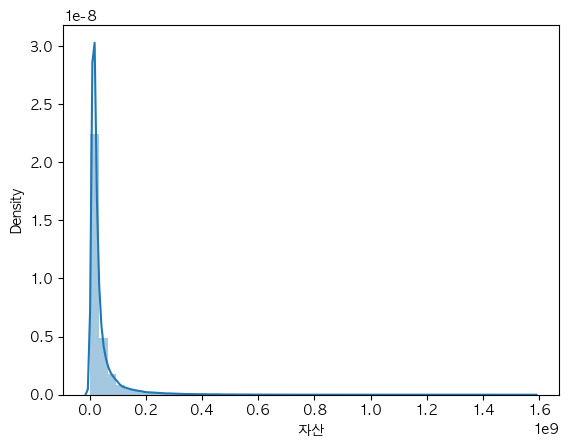

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


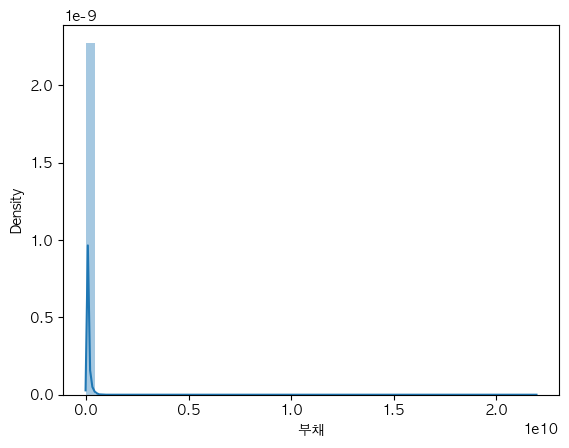

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


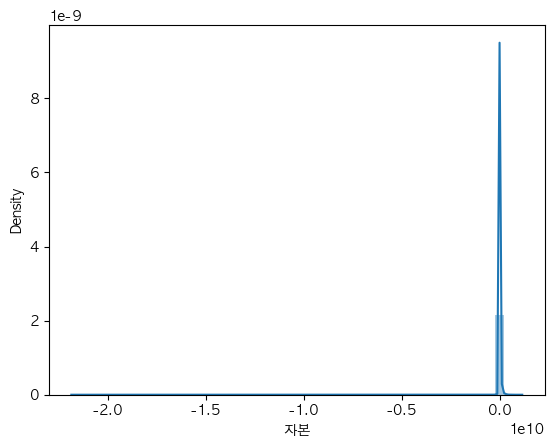

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


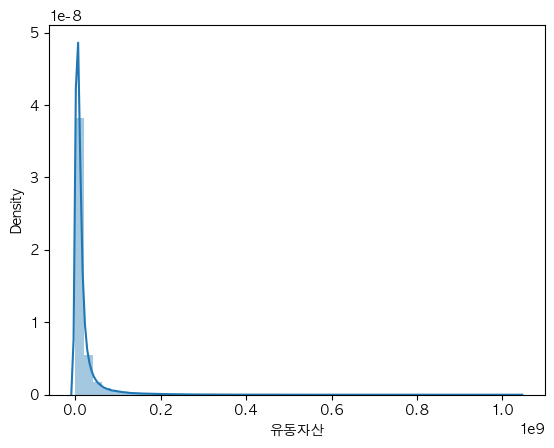

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


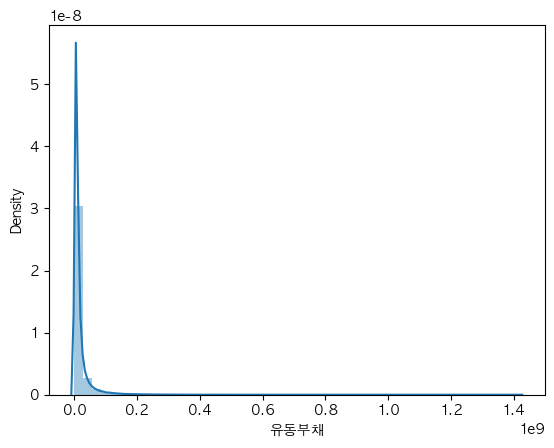

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


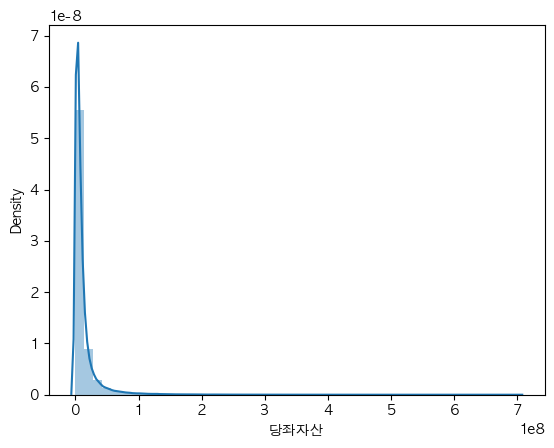

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


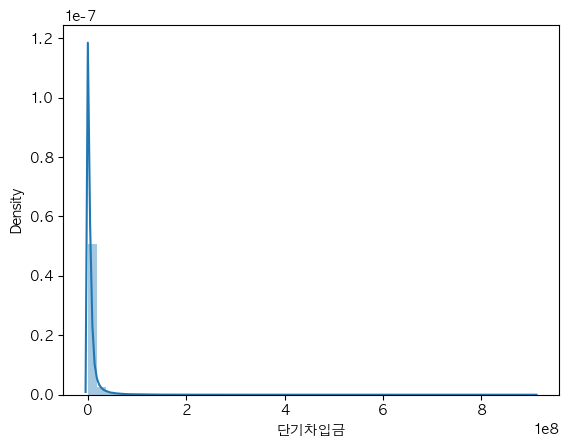

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


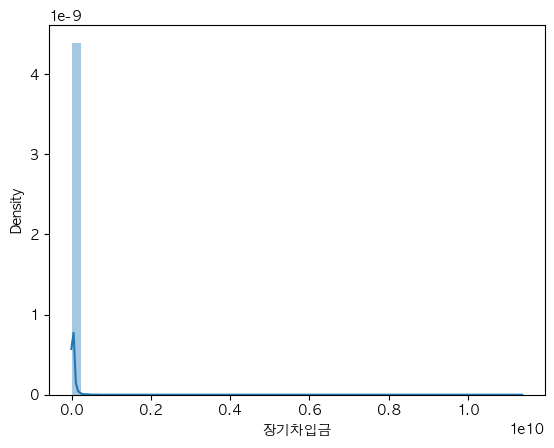

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


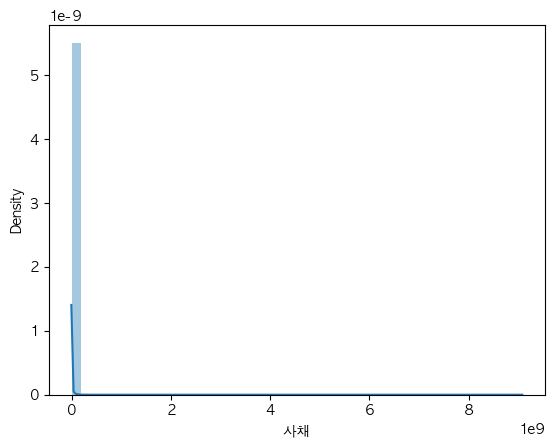

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


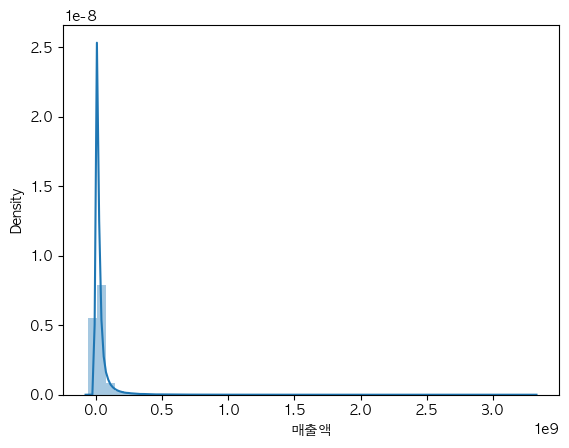

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


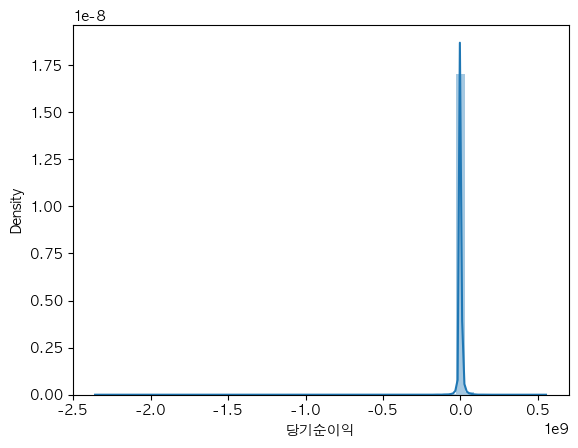

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


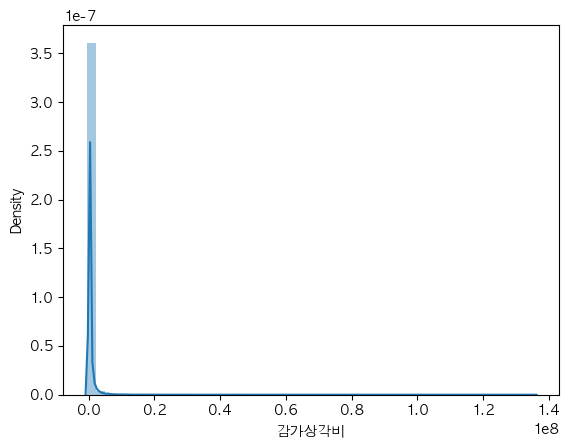

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


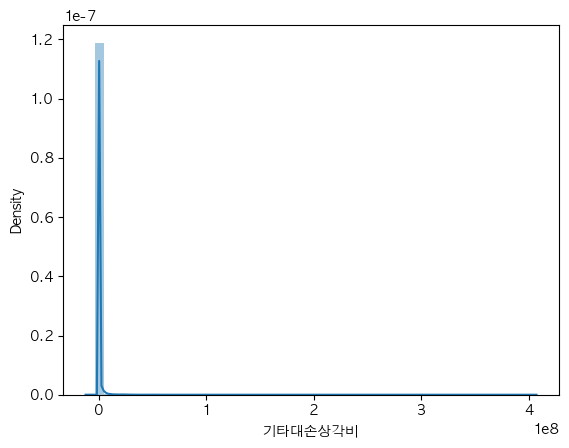

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


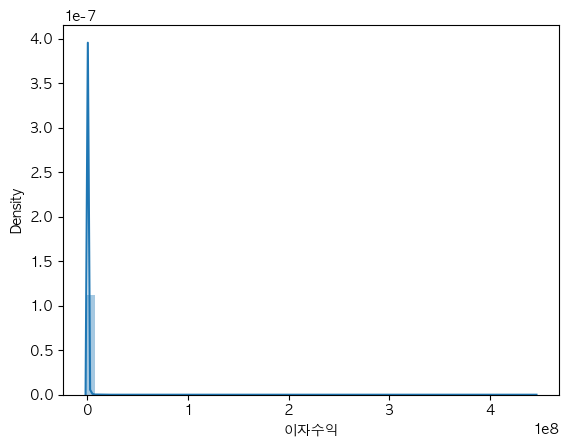

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


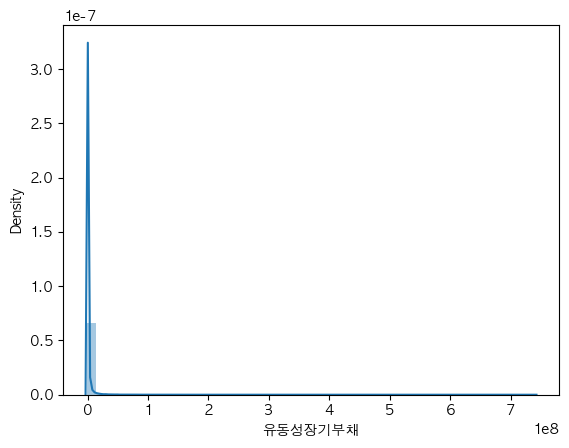

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


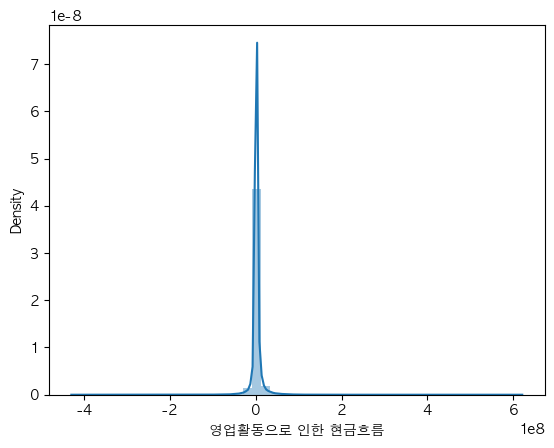

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


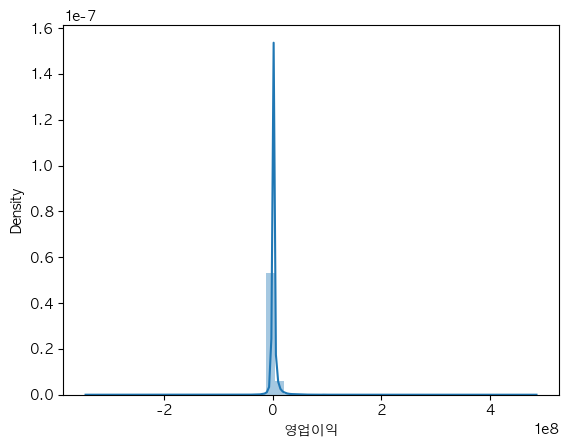

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


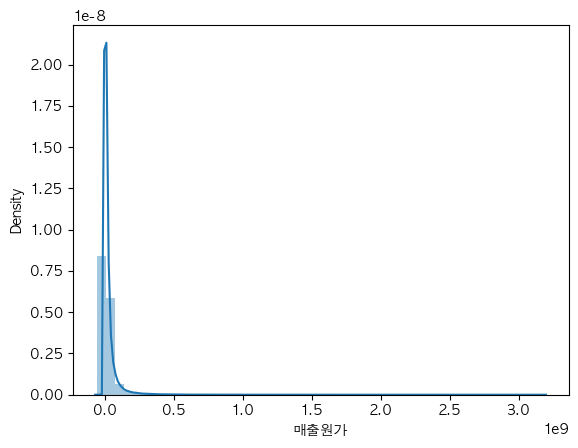

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


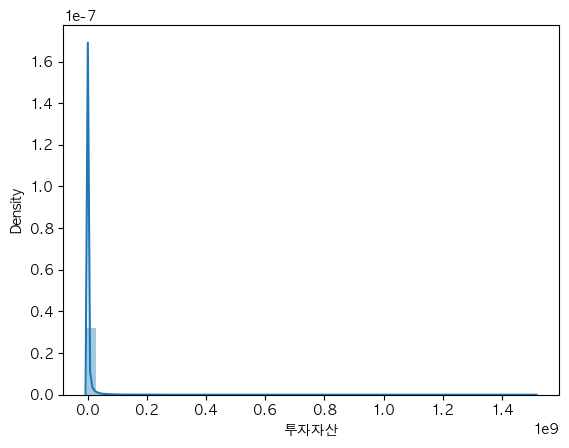

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


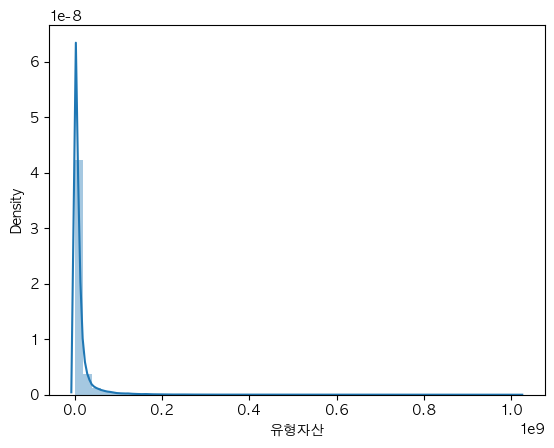

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


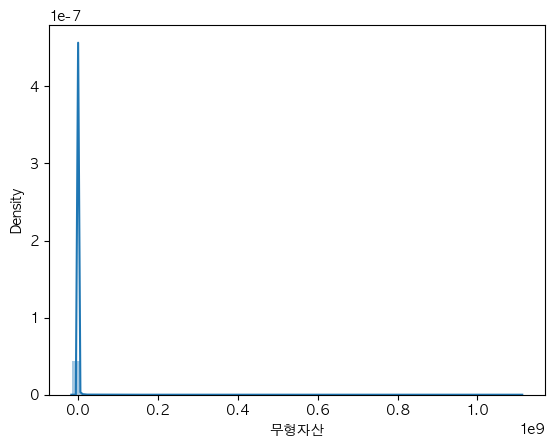

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


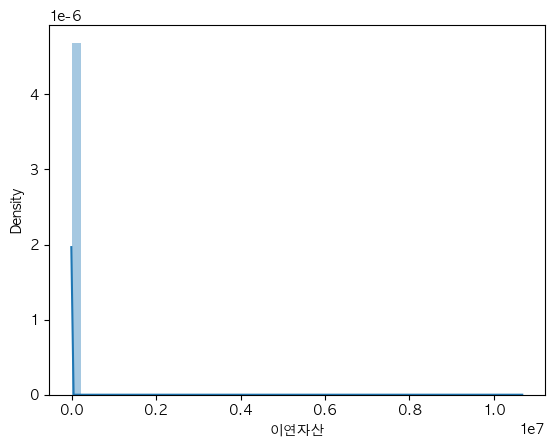

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


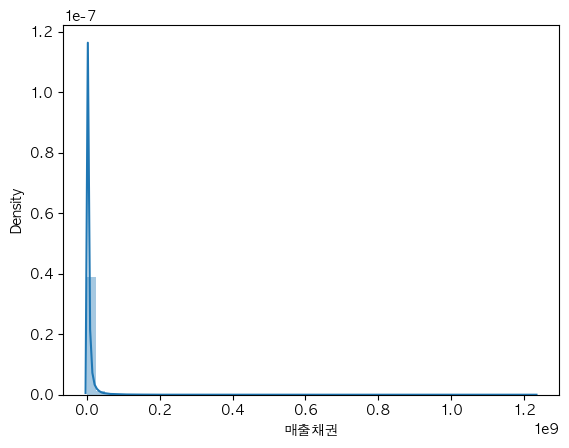

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


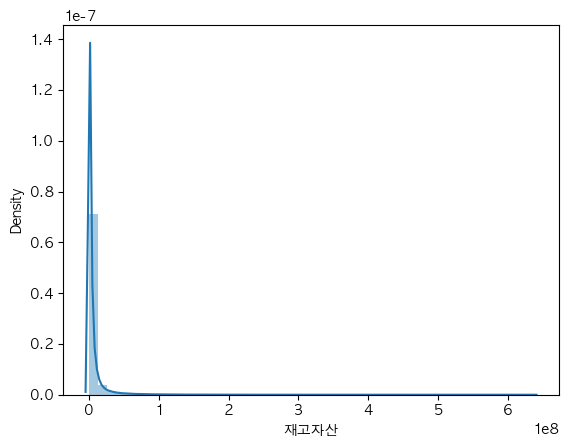

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


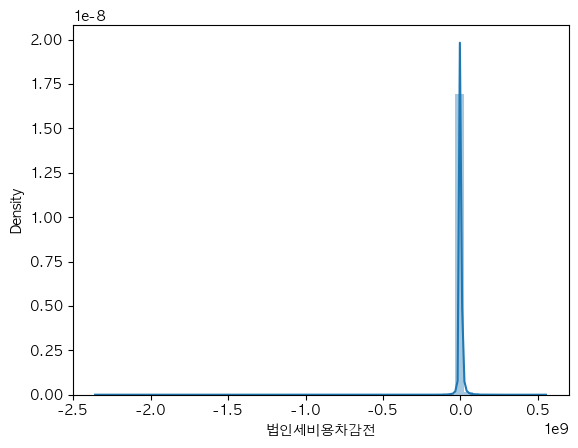

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


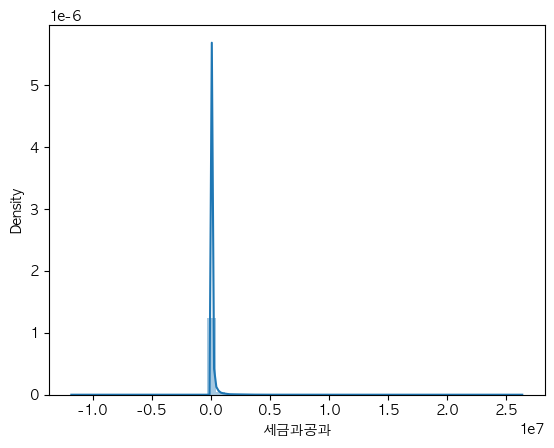

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


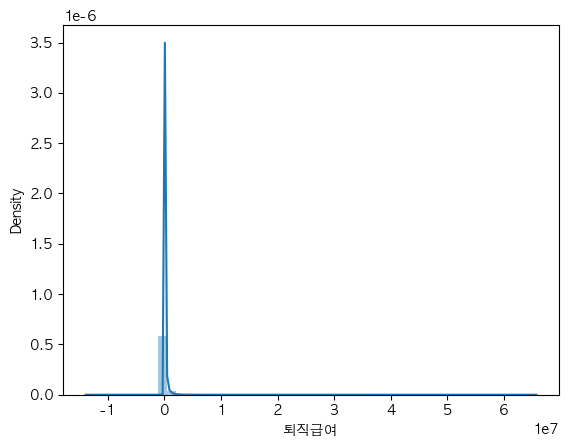

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


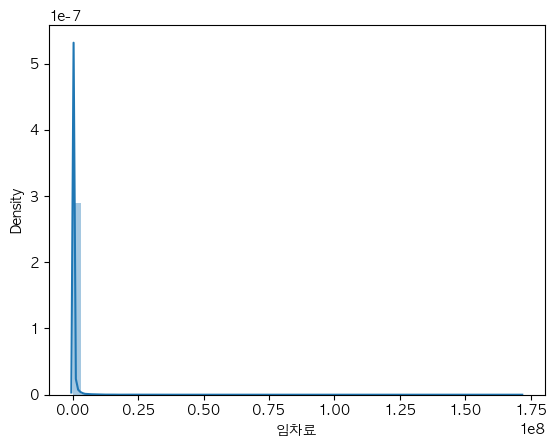

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


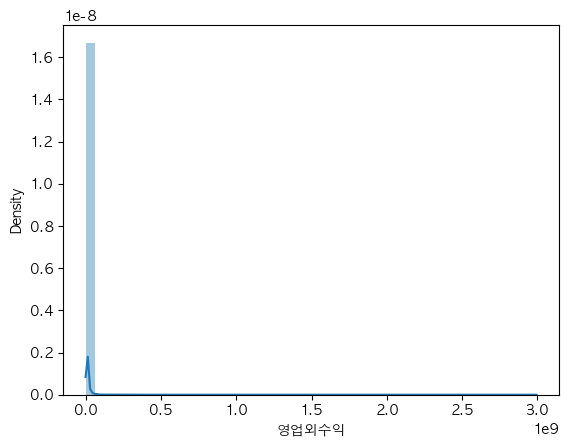

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


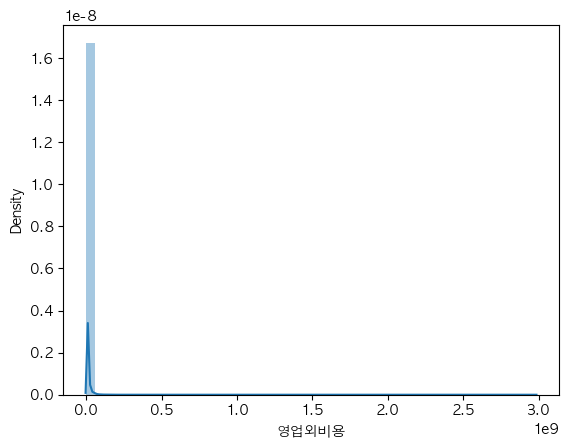

/var/folders/k5/s7jd1sh12dq55cnhmb7v_4sr0000gn/T/ipykernel_5328/2597565465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[c])


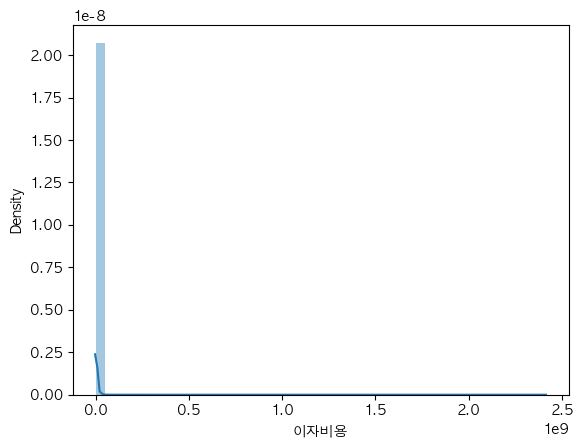

In [45]:
col = df.columns[3:-1]
for c in col:
    sns.distplot(df[c])
    plt.show()

#### 재무비율 변수 생성

In [46]:
# 안정성
df['자기자본비율'] = df['자본']/(df['자산']) * 100
df['부채비율'] = df['부채']/df['자본'] * 100
df['유동비율'] = df['유동자산']/df['유동부채'] * 100
df['당좌비율'] = df['당좌자산']/df['유동부채'] * 100
df['차입금의존도'] = (df['장기차입금'] + df['단기차입금'] + df['사채']) / df['자산'] * 100
df['OCF'] = df['영업활동으로 인한 현금흐름']

In [47]:
# 수익성
df['경상이익'] = df['영업이익'] + df['영업외수익'] - df['영업외비용']
df['총자산이익률'] = df['당기순이익'] / df['자산'] * 100
df['총자본경상이익률'] = df['경상이익'] / df['자산'] * 100
df['자기자본순이익률'] = df['당기순이익'] / df['자본'] * 100
df['매출액경상이익률'] = df['경상이익'] / df['매출액'] * 100
df['자기자본영업이익률'] = df['영업이익']/df['자본']*100
df['매출액영업이익률'] = df['영업이익'] / df['매출액'] * 100
df['매출원가율'] = df['매출원가'] / df['매출액'] * 100
df['이자보상배율'] = df['영업이익'] / df['이자비용'] * 100

In [48]:
# 활동성
df['총자본회전율'] = df['매출액'] / df['자산'] * 100
df['자기자본회전율'] = df['매출액'] / df['자본'] * 100
df['고정자산'] = df['투자자산'] + df['유형자산'] + df['무형자산'] + df['이연자산']
df['고정자산회전율'] = df['매출액'] / df['고정자산'] * 100
df['재고자산회전율'] = df['매출액'] / df['재고자산'] * 100
df['매출채권회전율'] = df['매출액'] / df['매출채권'] * 100
df['순운전자본'] = df['유동자산'] - df['유동부채']
df['순운전자본회전율'] = df['매출액'] / df['순운전자본'] * 100

In [49]:
# 성장성
df['총자본증가율'] = (df['자산'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자산'].shift(1)) / np.abs(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자산'].shift(1)) * 100
df['총자본증가율'] = (df['자본'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자본'].shift(1)) / np.abs(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['자본'].shift(1)) * 100
df['유형자산증가율'] = (df['유형자산'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['유형자산'].shift(1)) / np.abs(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['유형자산'].shift(1)) * 100
df['매출액증가율'] = (df['매출액'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['매출액'].shift(1)) / np.abs(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['매출액'].shift(1)) * 100
df['순이익증가율'] = (df['당기순이익'] - df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['당기순이익'].shift(1)) / np.abs(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['당기순이익'].shift(1)) * 100

#### 재무비율 계산 후 이상치 처리

##### 음수값 처리

In [50]:
df.loc[(df['자본'] < 0) & (df['자산'] < 0) , '자기자본비율'] = -(df['자기자본비율'])

In [51]:
df.loc[(df['당기순이익'] < 0) & (df['자본'] < 0) , '자기자본순이익률'] = -(df['자기자본순이익률'])

In [52]:
df.loc[(df['경상이익'] < 0) & (df['매출액'] < 0) , '매출액경상이익률'] = -(df['매출액경상이익률'])

In [53]:
df.loc[(df['영업이익'] < 0) & (df['자본'] < 0) , '자기자본영업이익률'] = -(df['자기자본영업이익률'])

In [54]:
df.loc[(df['영업이익'] < 0) & (df['매출액'] < 0) , '매출액영업이익률'] = -(df['매출액영업이익률'])

In [55]:
df.loc[(df['매출원가'] < 0) & (df['매출액'] < 0) , '매출원가율'] = -(df['매출원가율'])

In [56]:
df.loc[(df['매출액'] < 0) & (df['자본'] < 0) , '자기자본회전율'] = -(df['자기자본회전율'])

In [57]:
df.loc[(df['매출액'] < 0) & (df['순운전자본'] < 0) , '순운전자본회전율'] = -(df['순운전자본회전율'])

##### NaN 처리

In [58]:
df.drop(df.sort_values(by='회계년도', ascending=True).groupby('거래소코드').head(1).index, inplace=True)

In [59]:
df.columns[df.isnull().sum() > 0]

Index(['자기자본비율', '부채비율', '유동비율', '당좌비율', '차입금의존도', '총자본경상이익률', '매출액경상이익률',
       '자기자본영업이익률', '매출액영업이익률', '매출원가율', '이자보상배율', '총자본회전율', '자기자본회전율',
       '고정자산회전율', '재고자산회전율', '매출채권회전율', '순운전자본회전율', '유형자산증가율', '매출액증가율',
       '순이익증가율'],
      dtype='object')

In [60]:
df[df['자기자본비율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
136822,53613,위트러스트에셋(주),2015,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,NaN,NaN,NaN,0.00000,NaN,-100.00000,-100.00000,-100.00000,-8.33175
172618,61386,하이스텍주식회사,2011,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,0.00000,inf,-100.00000,-100.00000,170.49924,-2369.69062
197381,50077,(주)씨스테인웨그웨어하우징,2008,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,0.00000,inf,-100.00000,-100.00000,26.40571,61.51570


In [61]:
len(df[df['자기자본비율'].isnull()])

3

In [62]:
df.drop(df[df['자기자본비율'].isnull()].index, inplace=True)

In [63]:
df[df['차입금의존도'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
121869,46222,(주)미르이앤씨,2014,0.00000,148143083.00000,-148143083.00000,0.00000,148143083.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-148143083.00000,-207.16201,-77.09316,-100.00000,11253885.69857,-819.24283
151410,50708,(주)피엘디앤씨,2010,0.00000,28368019.00000,-28368019.00000,0.00000,28368019.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-28368019.00000,-225.62443,-6368.69725,-100.00000,inf,-3672.89481
162692,43144,(주)현민기연,2007,0.00000,48174.00000,-48174.00000,0.00000,48174.00000,0.00000,0.00000,...,0.00000,inf,inf,inf,-48174.00000,-37045.11355,-101.70086,-100.00000,-3.19483,-580.95042


In [64]:
len(df[df['차입금의존도'].isnull()])

3

In [65]:
df['차입금의존도'] = df['차입금의존도'].fillna(0.0)

In [66]:
df[df['매출액경상이익률'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
7163,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,2122765.00000,0.00000,-62.63043,-79.49600,-100.00000,-1500.54755
27078,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-999772.00000,-0.00000,8.85552,-100.00000,-100.00000,112.43898
37487,50648,(주)아로마엘에스티,2013,10581132.00000,4111492.00000,6469640.00000,226293.00000,4111492.00000,226293.00000,4091854.00000,...,10344838.00000,0.00000,NaN,NaN,-3885199.00000,-0.00000,0.00000,NaN,NaN,100.00000
42873,19875,닥터하우스,2015,1247060.00000,1286240.00000,-39180.00000,907493.00000,1214948.00000,907493.00000,0.00000,...,339307.00000,0.00000,NaN,NaN,-307455.00000,-0.00000,-116.08249,-100.00000,-100.00000,-5709.99802
43049,73269,대성큐(주),2017,6078326.00000,9699365.00000,-3621039.00000,5915291.00000,8338822.00000,5162488.00000,6979221.00000,...,11550.00000,0.00000,0.00000,0.00000,-2423531.00000,-0.00000,-309.30078,-95.78265,-100.00000,-33.16570
44103,57933,디에스아이티위너스,2014,6529964.00000,186356.00000,6343608.00000,548.00000,186356.00000,548.00000,74602.00000,...,6529415.00000,0.00000,NaN,NaN,-185808.00000,-0.00000,-47.79907,NaN,NaN,100.00000
45024,49544,반포산업주식회사,2015,4786510.00000,10046702.00000,-5260192.00000,1377238.00000,9692896.00000,825426.00000,5600130.00000,...,3282315.00000,0.00000,0.00000,NaN,-8315658.00000,-0.00000,-154.70692,-47.16770,-100.00000,100.00000
58636,54112,(주)풍림강업,2009,25081989.00000,19759878.00000,5322111.00000,5519020.00000,19673393.00000,5369072.00000,10984177.00000,...,19522658.00000,0.00000,0.00000,0.00000,-14154373.00000,-0.00000,-25.79567,0.00000,-100.00000,100.00000
103886,60537,(주)에스비에스아이피티브이에스피씨,2011,10326784.00000,10316784.00000,10000.00000,5826784.00000,15908.00000,5826784.00000,0.00000,...,4500000.00000,0.00000,NaN,NaN,5810876.00000,0.00000,0.00000,NaN,NaN,NaN
103887,60537,(주)에스비에스아이피티브이에스피씨,2012,10451339.00000,10441339.00000,10000.00000,5878261.00000,6499.00000,5878261.00000,0.00000,...,4573078.00000,0.00000,NaN,NaN,5871762.00000,0.00000,0.00000,NaN,NaN,NaN


In [67]:
len(df[(df['매출액경상이익률'].isnull()) & (df['매출액']==0.0) & (df['경상이익']==0.0)])

56

In [68]:
df['매출액경상이익률'] = df['매출액경상이익률'].fillna(0.0)

In [69]:
df[df['매출액영업이익률'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
7163,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,2122765.00000,0.00000,-62.63043,-79.49600,-100.00000,-1500.54755
15610,19802,한국상-고방베트로텍스주식회사,2008,17816908.00000,25093552.00000,-7276644.00000,1308007.00000,25093552.00000,1308007.00000,18700000.00000,...,16481967.00000,0.00000,NaN,NaN,-23785545.00000,-0.00000,26.00484,-12.30672,-100.00000,105.28617
15611,19802,한국상-고방베트로텍스주식회사,2009,16797968.00000,24053270.00000,-7255302.00000,1295602.00000,24053270.00000,1295602.00000,21253868.00000,...,15475432.00000,0.00000,NaN,NaN,-22757668.00000,-0.00000,0.29329,-6.10689,NaN,-99.16549
27078,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-999772.00000,-0.00000,8.85552,-100.00000,-100.00000,112.43898
35104,58223,(주)디엔브이,2010,28415769.00000,2737007.00000,25678762.00000,5113.00000,0.00000,5113.00000,0.00000,...,28410657.00000,0.00000,NaN,NaN,5113.00000,0.00000,3.47754,NaN,NaN,2002849.33333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247677,61327,푸른제천지키미주식회사,2012,72712695.00000,64819491.00000,7893204.00000,1393235.00000,5730019.00000,1393235.00000,0.00000,...,71319460.00000,0.00000,NaN,NaN,-4336784.00000,-0.00000,0.00435,35.45559,NaN,-82.20954
249202,46888,(주)비큐공영,2008,3014544.00000,5364854.00000,-2350310.00000,1270700.00000,5197606.00000,1270700.00000,4285579.00000,...,227.00000,0.00000,NaN,0.00000,-3926906.00000,-0.00000,-172.24467,-99.99641,-100.00000,-67.48420
252899,47300,반도모터스(주),2011,6636066.00000,10022898.00000,-3386832.00000,6275527.00000,10022898.00000,6081093.00000,600000.00000,...,90539.00000,0.00000,0.00000,0.00000,-3747371.00000,-0.00000,-5539.90748,-99.27316,-100.00000,-472.68946
254849,30329,저먼모터스(주),2008,12516024.00000,23474901.00000,-10958877.00000,4542032.00000,22980744.00000,4542032.00000,16693849.00000,...,7973993.00000,0.00000,NaN,0.00000,-18438712.00000,-0.00000,-1628.78441,-99.91264,-100.00000,-107.84123


In [70]:
len(df[(df['매출액영업이익률'].isnull()) & (df['매출액']==0.0) & (df['영업이익']==0.0)])

132

In [71]:
df['매출액영업이익률'] = df['매출액영업이익률'].fillna(0.0)

In [72]:
df[df['매출원가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
830,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,NaN,0.00000,NaN,360061.00000,0.00000,41.89934,-100.00000,NaN,233.36305
831,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,NaN,312743.00000,0.00000,-11.76050,inf,NaN,-139.82896
3196,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,NaN,NaN,525268.00000,0.00000,6035.68763,-48.59180,-100.00000,-156.05427
3197,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,NaN,NaN,120206.00000,0.00000,-62.46147,112.76531,NaN,-9.74565
3525,56782,(주)에프앤에프인베스트먼트,2009,1986500.00000,5918457.00000,-3931957.00000,678933.00000,5918457.00000,678933.00000,4238395.00000,...,1307267.00000,0.00000,NaN,NaN,-5239524.00000,-0.00000,-214.79342,3591900.00000,-100.00000,-247.30648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258082,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,NaN,-192950536.00000,-0.00000,-35.79020,344.64172,NaN,-39226.77427
258085,50421,효성도시개발(주),2016,302350875.00000,654746878.00000,-352396003.00000,302243084.00000,654708378.00000,71164077.00000,398478331.00000,...,80031.00000,0.00000,0.00000,0.00000,-352465294.00000,-0.00000,-23.57200,-69.22276,-100.00000,-226.94839
258086,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,NaN,-565113205.00000,-0.00000,-60.34908,-94.86122,NaN,-216.36922
258128,46454,효자산업(주),2009,17370246.00000,2237710.00000,15132536.00000,975942.00000,1761102.00000,956019.00000,1306940.00000,...,16093235.00000,0.00000,0.00000,NaN,-785160.00000,-0.00000,1.79561,-0.31477,-100.00000,-96.98169


In [73]:
len(df[(df['매출원가율'].isnull()) & (df['매출액']==0.0) & (df['매출원가']==0.0)])

9526

In [74]:
df['매출원가율'] = df['매출원가율'].fillna(0.0)

In [75]:
df[df['이자보상배율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
7163,28336,동부철구주식회사,2016,15482469.00000,1397199.00000,14085270.00000,2881928.00000,759163.00000,2881928.00000,0.00000,...,12600541.00000,0.00000,NaN,0.00000,2122765.00000,0.00000,-62.63043,-79.49600,-100.00000,-1500.54755
27078,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-999772.00000,-0.00000,8.85552,-100.00000,-100.00000,112.43898
35104,58223,(주)디엔브이,2010,28415769.00000,2737007.00000,25678762.00000,5113.00000,0.00000,5113.00000,0.00000,...,28410657.00000,0.00000,NaN,NaN,5113.00000,0.00000,3.47754,NaN,NaN,2002849.33333
37487,50648,(주)아로마엘에스티,2013,10581132.00000,4111492.00000,6469640.00000,226293.00000,4111492.00000,226293.00000,4091854.00000,...,10344838.00000,0.00000,NaN,NaN,-3885199.00000,-0.00000,0.00000,NaN,NaN,100.00000
42873,19875,닥터하우스,2015,1247060.00000,1286240.00000,-39180.00000,907493.00000,1214948.00000,907493.00000,0.00000,...,339307.00000,0.00000,NaN,NaN,-307455.00000,-0.00000,-116.08249,-100.00000,-100.00000,-5709.99802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247657,48128,푸른아산지키미주식회사,2009,72479727.00000,62253619.00000,10226108.00000,1459292.00000,275.00000,1459292.00000,0.00000,...,71020435.00000,0.00000,NaN,NaN,1459017.00000,0.00000,0.00518,66.65467,NaN,-52.46637
247676,61327,푸른제천지키미주식회사,2011,54166953.00000,46274092.00000,7892861.00000,1515407.00000,2574620.00000,1515407.00000,0.00000,...,52651546.00000,0.00000,NaN,NaN,-1059213.00000,-0.00000,0.02443,83.53237,NaN,437.65324
247677,61327,푸른제천지키미주식회사,2012,72712695.00000,64819491.00000,7893204.00000,1393235.00000,5730019.00000,1393235.00000,0.00000,...,71319460.00000,0.00000,NaN,NaN,-4336784.00000,-0.00000,0.00435,35.45559,NaN,-82.20954
247706,58547,푸른한강타운주식회사,2010,83764919.00000,73360149.00000,10404770.00000,873240.00000,1110149.00000,873240.00000,0.00000,...,0.00000,inf,inf,inf,-236909.00000,-22281.95045,-0.08838,NaN,75.07278,-130.58214


In [76]:
len(df[(df['이자보상배율'].isnull()) & (df['영업이익'] == 0.0) & (df['이자비용'] == 0.0)])

127

In [77]:
df['이자보상배율'] = df['이자보상배율'].fillna(0.0)

In [78]:
df[df['총자본회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
184889,45080,(주)엔스퍼트,2015,0.00000,22390035.00000,-22390035.00000,0.00000,21804692.00000,0.00000,5302669.00000,...,0.00000,NaN,NaN,0.00000,-21804692.00000,-0.00000,-461.29585,-100.00000,-100.00000,-102.17656


In [79]:
len(df[(df['총자본회전율'].isnull()) & (df['매출액'] == 0.0) & (df['자산'] == 0.0)])

1

In [80]:
df['총자본회전율'] = df['총자본회전율'].fillna(0.0)

In [81]:
df[df['고정자산회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
830,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,NaN,0.00000,NaN,360061.00000,0.00000,41.89934,-100.00000,NaN,233.36305
27078,44672,요크인터내셔날(주),2009,106045.00000,1105817.00000,-999772.00000,106045.00000,1105817.00000,106045.00000,1100000.00000,...,0.00000,NaN,NaN,NaN,-999772.00000,-0.00000,8.85552,-100.00000,-100.00000,112.43898
29407,76159,주식회사에스티에스프로바이더,2016,255283.00000,10620452.00000,-10365169.00000,250363.00000,10620452.00000,250363.00000,0.00000,...,0.00000,NaN,NaN,0.00000,-10370089.00000,-0.00000,-629.72921,NaN,NaN,-17179.77366
33913,59417,(주)나라에이스홀딩스,2010,7834271.00000,116270.00000,7718001.00000,7834271.00000,116270.00000,7834271.00000,0.00000,...,0.00000,NaN,NaN,NaN,7718001.00000,0.00000,-7.17775,NaN,NaN,-107.73997
33914,59417,(주)나라에이스홀딩스,2011,13303962.00000,5160099.00000,8143863.00000,13303962.00000,5160099.00000,13303962.00000,5112115.00000,...,0.00000,NaN,NaN,NaN,8143863.00000,0.00000,5.51778,NaN,NaN,171.35571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256606,58818,창해산업개발주식회사,2011,29698951.00000,31416349.00000,-1717398.00000,29697951.00000,2609989.00000,280362.00000,2559440.00000,...,0.00000,NaN,0.00000,NaN,27087962.00000,0.00000,-58.70357,-100.00000,NaN,18.13680
257294,49603,한유주택주식회사,2012,162468991.00000,268862211.00000,-106393220.00000,162468991.00000,268862211.00000,5628232.00000,252576637.00000,...,0.00000,NaN,0.00000,NaN,-106393220.00000,-0.00000,32.74688,-100.00000,NaN,402.12179
257295,49603,한유주택주식회사,2013,161751503.00000,276163287.00000,-114411784.00000,161751503.00000,276163287.00000,4729547.00000,259182934.00000,...,0.00000,NaN,0.00000,NaN,-114411784.00000,-0.00000,-7.53672,NaN,NaN,-115.47837
257825,40238,화삼개발주식회사,2017,8217861.00000,9665831.00000,-1447970.00000,8162581.00000,9602671.00000,3206096.00000,7049000.00000,...,0.00000,NaN,0.00000,NaN,-1440090.00000,-0.00000,-223.28731,-100.00000,-100.00000,-2868.55319


In [82]:
len(df[(df['고정자산회전율'].isnull()) & (df['매출액'] == 0.0) & (df['고정자산'] == 0.0) & ((df['투자자산'] == 0.0))])

1186

In [83]:
df['고정자산회전율'] = df['고정자산회전율'].fillna(0.0)

In [84]:
df[df['재고자산회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
3196,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,NaN,NaN,525268.00000,0.00000,6035.68763,-48.59180,-100.00000,-156.05427
3197,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,NaN,NaN,120206.00000,0.00000,-62.46147,112.76531,NaN,-9.74565
3525,56782,(주)에프앤에프인베스트먼트,2009,1986500.00000,5918457.00000,-3931957.00000,678933.00000,5918457.00000,678933.00000,4238395.00000,...,1307267.00000,0.00000,NaN,NaN,-5239524.00000,-0.00000,-214.79342,3591900.00000,-100.00000,-247.30648
3591,58773,(주)연호,2010,28322776.00000,26036546.00000,2286230.00000,9021.00000,26036546.00000,9021.00000,25986763.00000,...,28293756.00000,0.00000,NaN,NaN,-26027525.00000,-0.00000,-17.01124,27.76667,NaN,-104.49630
3592,58773,(주)연호,2011,30379376.00000,29716447.00000,662929.00000,57157.00000,29666447.00000,57157.00000,24977804.00000,...,30322030.00000,0.00000,NaN,NaN,-29609290.00000,-0.00000,-71.00340,7.15187,NaN,-246.38846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257733,49715,호성주택(주),2010,1322161.00000,1174655.00000,147505.00000,1303550.00000,1148479.00000,1303550.00000,0.00000,...,8611.00000,0.00000,NaN,NaN,155071.00000,0.00000,101.09572,-45.09927,NaN,352.88165
257790,63224,홍성맑은물사랑주식회사,2012,39499219.00000,35668315.00000,3830904.00000,1389929.00000,2933315.00000,1389929.00000,0.00000,...,38104290.00000,0.00000,NaN,NaN,-1543386.00000,-0.00000,-1.76973,145.58900,NaN,-24.52503
257791,63224,홍성맑은물사랑주식회사,2013,71276132.00000,67604245.00000,3671887.00000,1629611.00000,1534245.00000,1629611.00000,0.00000,...,69641521.00000,0.00000,NaN,NaN,95366.00000,0.00000,-4.15090,-99.99834,NaN,-130.39932
257846,43828,화성건설주식회사,2011,6527407.00000,259513.00000,6267894.00000,6470784.00000,259513.00000,6470784.00000,0.00000,...,51622.00000,0.00000,NaN,NaN,6211271.00000,0.00000,128.51972,-10.71330,NaN,784.86809


In [85]:
len(df[(df['재고자산회전율'].isnull()) & (df['매출액'] == 0.0) & (df['재고자산'] == 0.0)])

5607

In [86]:
df['재고자산회전율'] = df['재고자산회전율'].fillna(0.0)

In [87]:
df[df['매출채권회전율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
830,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,0.00000,0.00000,NaN,360061.00000,0.00000,41.89934,-100.00000,NaN,233.36305
831,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,NaN,312743.00000,0.00000,-11.76050,inf,NaN,-139.82896
3196,30547,(주)아이스텍,2009,760918.00000,108764.00000,652154.00000,567865.00000,42597.00000,567865.00000,0.00000,...,13052.00000,0.00000,0.00000,NaN,525268.00000,0.00000,6035.68763,-48.59180,-100.00000,-156.05427
3197,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,0.00000,NaN,120206.00000,0.00000,-62.46147,112.76531,NaN,-9.74565
3525,56782,(주)에프앤에프인베스트먼트,2009,1986500.00000,5918457.00000,-3931957.00000,678933.00000,5918457.00000,678933.00000,4238395.00000,...,1307267.00000,0.00000,0.00000,NaN,-5239524.00000,-0.00000,-214.79342,3591900.00000,-100.00000,-247.30648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258081,50421,효성도시개발(주),2012,303732132.00000,445738447.00000,-142006315.00000,303627925.00000,436652477.00000,72548919.00000,325761943.00000,...,74466.00000,0.00000,0.00000,NaN,-133024552.00000,-0.00000,-0.09109,28.00325,NaN,99.70735
258082,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,NaN,-192950536.00000,-0.00000,-35.79020,344.64172,NaN,-39226.77427
258086,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,NaN,-565113205.00000,-0.00000,-60.34908,-94.86122,NaN,-216.36922
258128,46454,효자산업(주),2009,17370246.00000,2237710.00000,15132536.00000,975942.00000,1761102.00000,956019.00000,1306940.00000,...,16093235.00000,0.00000,0.00000,NaN,-785160.00000,-0.00000,1.79561,-0.31477,-100.00000,-96.98169


In [88]:
len(df[(df['매출채권회전율'].isnull()) & (df['매출액'] == 0.0) & (df['매출채권'] == 0.0)])

8965

In [89]:
df['매출채권회전율'] = df['매출채권회전율'].fillna(0.0)

In [90]:
df[df['유형자산증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
744,73176,(주)대성이노베이터,2015,2488478.00000,514465.00000,1974013.00000,2246478.00000,514465.00000,2246478.00000,0.00000,...,242000.00000,57.85124,inf,6.23768,1732013.00000,8.08308,1395.78577,NaN,250.00000,1259.29407
7855,14815,보원무역주식회사,2010,12231527.00000,11200315.00000,1031212.00000,8797951.00000,9537566.00000,8797951.00000,6408901.00000,...,3295765.00000,485.56927,inf,244.69598,-739615.00000,-2163.72329,-9.32957,NaN,9.47628,91.10810
9086,69797,수성테크(주),2014,7697476.00000,1825555.00000,5871921.00000,7697476.00000,1701593.00000,7697476.00000,804.00000,...,0.00000,inf,inf,1178.02096,5995883.00000,232.43401,-27.04915,NaN,-6.84889,-39.32967
9665,52772,아이레보아사아블로이코리아,2008,25937208.00000,34028812.00000,-8091604.00000,9480.00000,34028812.00000,9480.00000,33664748.00000,...,25927728.00000,0.00000,0.00000,0.00000,-34019332.00000,-0.00000,-192.85118,NaN,NaN,-95.17456
9666,52772,아이레보아사아블로이코리아,2009,24949187.00000,39550203.00000,-14601016.00000,2608.00000,39550203.00000,2608.00000,38295663.00000,...,24946579.00000,0.00000,0.00000,0.00000,-39547595.00000,-0.00000,-80.44650,NaN,NaN,14.47950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258306,61283,희망배움터주식회사,2011,11841560.00000,11329025.00000,512535.00000,1556988.00000,1444662.00000,1556988.00000,0.00000,...,10284572.00000,5.96707,inf,inf,112326.00000,546.34546,-8.18191,NaN,317.66804,50.10978
258307,61283,희망배움터주식회사,2012,10400827.00000,9927505.00000,473321.00000,1240290.00000,1096678.00000,1240290.00000,0.00000,...,9160537.00000,6.19234,inf,inf,143612.00000,394.98928,-7.65099,NaN,-7.56671,14.13995
258308,61283,희망배움터주식회사,2013,9674584.00000,9466268.00000,208316.00000,1691662.00000,1615806.00000,1691662.00000,0.00000,...,7982922.00000,6.04172,inf,inf,75856.00000,635.81787,-55.98843,NaN,-14.97500,-575.79436
258309,61283,희망배움터주식회사,2014,8116034.00000,7892857.00000,223177.00000,1378577.00000,1268777.00000,1378577.00000,0.00000,...,6737457.00000,6.42086,inf,inf,109800.00000,393.99180,7.13387,NaN,-10.30528,105.60780


In [91]:
len(df[(df['유형자산증가율'].isnull()) & (df['유형자산'] == 0.0)])

8028

In [92]:
df['유형자산증가율'] = df['유형자산증가율'].fillna(0.0)

In [93]:
df[df['매출액증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
830,78840,(주)대영산전,2016,8655514.00000,8265453.00000,390060.00000,8625514.00000,8265453.00000,5290.00000,8265454.00000,...,0.00000,0.00000,0.00000,0.00000,360061.00000,0.00000,41.89934,-100.00000,NaN,233.36305
831,78840,(주)대영산전,2017,9121543.00000,8777356.00000,344187.00000,9090099.00000,8777356.00000,15521.00000,8772246.00000,...,1444.00000,0.00000,0.00000,0.00000,312743.00000,0.00000,-11.76050,inf,NaN,-139.82896
3197,30547,(주)아이스텍,2010,369934.00000,125125.00000,244809.00000,162165.00000,41959.00000,162165.00000,0.00000,...,27769.00000,0.00000,0.00000,0.00000,120206.00000,0.00000,-62.46147,112.76531,NaN,-9.74565
3591,58773,(주)연호,2010,28322776.00000,26036546.00000,2286230.00000,9021.00000,26036546.00000,9021.00000,25986763.00000,...,28293756.00000,0.00000,0.00000,0.00000,-26027525.00000,-0.00000,-17.01124,27.76667,NaN,-104.49630
3592,58773,(주)연호,2011,30379376.00000,29716447.00000,662929.00000,57157.00000,29666447.00000,57157.00000,24977804.00000,...,30322030.00000,0.00000,0.00000,0.00000,-29609290.00000,-0.00000,-71.00340,7.15187,NaN,-246.38846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258080,50421,효성도시개발(주),2011,303860436.00000,445737515.00000,-141877079.00000,303728032.00000,436622565.00000,72649026.00000,325750058.00000,...,71016.00000,0.00000,0.00000,0.00000,-132894533.00000,-0.00000,-45.19277,-34.99367,NaN,-6.94063
258081,50421,효성도시개발(주),2012,303732132.00000,445738447.00000,-142006315.00000,303627925.00000,436652477.00000,72548919.00000,325761943.00000,...,74466.00000,0.00000,0.00000,0.00000,-133024552.00000,-0.00000,-0.09109,28.00325,NaN,99.70735
258082,50421,효성도시개발(주),2013,301785178.00000,494615843.00000,-192830665.00000,301626807.00000,494577343.00000,70346097.00000,281774268.00000,...,128570.00000,0.00000,0.00000,0.00000,-192950536.00000,-0.00000,-35.79020,344.64172,NaN,-39226.77427
258086,50421,효성도시개발(주),2017,302996247.00000,868059983.00000,-565063736.00000,302908278.00000,868021483.00000,71675501.00000,399283739.00000,...,59109.00000,0.00000,0.00000,0.00000,-565113205.00000,-0.00000,-60.34908,-94.86122,NaN,-216.36922


In [94]:
len(df[(df['매출액증가율'].isnull()) & (df['매출액'] == 0.0)])

8029

In [95]:
df['매출액증가율'] = df['매출액증가율'].fillna(0.0)

In [96]:
df[df['순이익증가율'].isnull()]

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,고정자산,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율
103886,60537,(주)에스비에스아이피티브이에스피씨,2011,10326784.00000,10316784.00000,10000.00000,5826784.00000,15908.00000,5826784.00000,0.00000,...,4500000.00000,0.00000,0.00000,0.00000,5810876.00000,0.00000,0.00000,0.00000,0.00000,NaN
103887,60537,(주)에스비에스아이피티브이에스피씨,2012,10451339.00000,10441339.00000,10000.00000,5878261.00000,6499.00000,5878261.00000,0.00000,...,4573078.00000,0.00000,0.00000,0.00000,5871762.00000,0.00000,0.00000,0.00000,0.00000,NaN
103888,60537,(주)에스비에스아이피티브이에스피씨,2013,9098849.00000,9088849.00000,10000.00000,2140225.00000,1127.00000,2140225.00000,0.00000,...,6958623.00000,0.00000,0.00000,0.00000,2139098.00000,0.00000,0.00000,0.00000,0.00000,NaN
103889,60537,(주)에스비에스아이피티브이에스피씨,2014,6636045.00000,6626045.00000,10000.00000,1566582.00000,5.00000,1566582.00000,0.00000,...,5069464.00000,0.00000,0.00000,0.00000,1566577.00000,0.00000,0.00000,0.00000,0.00000,NaN
111006,58891,에스비에스케이티에스피씨,2010,25572695.00000,25562695.00000,10000.00000,20983695.00000,53082.00000,20983695.00000,0.00000,...,4589000.00000,0.00000,0.00000,0.00000,20930613.00000,0.00000,0.00000,0.00000,0.00000,NaN
111007,58891,에스비에스케이티에스피씨,2011,26058302.00000,26048302.00000,10000.00000,16405490.00000,67017.00000,16405490.00000,0.00000,...,9652812.00000,0.00000,0.00000,0.00000,16338473.00000,0.00000,0.00000,0.00000,0.00000,NaN
111008,58891,에스비에스케이티에스피씨,2012,23302123.00000,23292123.00000,10000.00000,12748862.00000,27147.00000,12748862.00000,0.00000,...,10553261.00000,0.00000,0.00000,0.00000,12721715.00000,0.00000,0.00000,0.00000,0.00000,NaN
111009,58891,에스비에스케이티에스피씨,2013,20000790.00000,19990790.00000,10000.00000,8695128.00000,4085.00000,8695128.00000,0.00000,...,11305662.00000,0.00000,0.00000,0.00000,8691043.00000,0.00000,0.00000,0.00000,0.00000,NaN
111010,58891,에스비에스케이티에스피씨,2014,17482392.00000,17472392.00000,10000.00000,5541906.00000,407.00000,5541906.00000,0.00000,...,11940486.00000,0.00000,0.00000,0.00000,5541499.00000,0.00000,0.00000,0.00000,0.00000,NaN
111011,58891,에스비에스케이티에스피씨,2015,14299560.00000,14289560.00000,10000.00000,7608403.00000,0.00000,7608403.00000,0.00000,...,6691157.00000,0.00000,0.00000,0.00000,7608403.00000,0.00000,0.00000,0.00000,0.00000,NaN


In [97]:
len(df[(df['순이익증가율'].isnull()) & (df['당기순이익'] == 0.0)])

39

In [98]:
df['순이익증가율'] = df['순이익증가율'].fillna(0.0)

##### inf값 처리

In [99]:
for i in range(len(df.columns)):
    col = df.columns[i]
    cnt = len( df[(df[col]==np.inf) | (df[col]==-np.inf)] )
    if cnt > 0 :
        print(col, cnt)

자기자본비율 6
부채비율 4
유동비율 161
당좌비율 161
차입금의존도 3
총자산이익률 6
총자본경상이익률 6
자기자본순이익률 4
매출액경상이익률 9617
자기자본영업이익률 4
매출액영업이익률 9541
매출원가율 147
이자보상배율 26037
총자본회전율 5
자기자본회전율 4
고정자산회전율 2204
재고자산회전율 47888
매출채권회전율 23173
순운전자본회전율 9
총자본증가율 1
유형자산증가율 1049
매출액증가율 4353
순이익증가율 70


In [100]:
df[((df['자기자본비율']==np.inf) | (df['자기자본비율']==-np.inf))][['회사명', '거래소코드', '회계년도', '자본', '자산', '부채', '자기자본비율']]

,회사명,거래소코드,회계년도,자본,자산,부채,자기자본비율
3186,(주)아올다,44071,2010,-2533393.00000,0.00000,2533393.00000,-inf
121869,(주)미르이앤씨,46222,2014,-148143083.00000,0.00000,148143083.00000,-inf
151410,(주)피엘디앤씨,50708,2010,-28368019.00000,0.00000,28368019.00000,-inf
162692,(주)현민기연,43144,2007,-48174.00000,0.00000,48174.00000,-inf
184889,(주)엔스퍼트,45080,2015,-22390035.00000,0.00000,22390035.00000,-inf
243398,주식회사세움씨엔디,53820,2009,-188560.00000,0.00000,188560.00000,-inf


In [101]:
df[((df['이자보상배율']==np.inf) | (df['이자보상배율']==-np.inf))][['회사명', '거래소코드', '회계년도', '영업이익', '이자비용', '이자보상배율']]

,회사명,거래소코드,회계년도,영업이익,이자비용,이자보상배율
71,(주)거흥산업,43460,2006,3538763.00000,0.00000,inf
80,(주)거흥산업,43460,2015,7713641.00000,0.00000,inf
81,(주)거흥산업,43460,2016,3714063.00000,0.00000,inf
251,(주)광산에스에이치아이,48172,2016,654352.00000,0.00000,inf
252,(주)광산에스에이치아이,48172,2017,289774.00000,0.00000,inf
...,...,...,...,...,...,...
258318,희망세움(주),63063,2015,-2754915.00000,0.00000,-inf
258319,희망세움(주),63063,2016,-2886206.00000,0.00000,-inf
258320,희망세움(주),63063,2017,-2628295.00000,0.00000,-inf
258343,힐코리아주식회사,43486,2008,-124916.00000,0.00000,-inf


In [102]:
max_interest = max(df[df['이자보상배율']!=np.inf]['이자보상배율'])
min_interest = min(df[df['이자보상배율']!=-np.inf]['이자보상배율'])
print(max_interest, min_interest)

4444671650.0 -656170000.0


In [103]:
df.loc[df['이자보상배율'] == np.inf, '이자보상배율'] = max_interest
df.loc[df['이자보상배율'] == -np.inf, '이자보상배율'] = min_interest

#### Target

In [104]:
df['이자보상배율_t'] = np.where(df['이자보상배율'] < 1, 1, 0)

In [105]:
df['target'] = np.where((df['이자보상배율_t'] == 1) & (df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['이자보상배율_t'].shift(1) == 1) & (df.sort_values(by='회계년도', ascending=True).groupby('거래소코드')['이자보상배율_t'].shift(2) == 1), 1, 0)

In [108]:
# 2000년 데이터가 없어서 정확한 target 값 X (이자보상배율 3년을 봐야하는데 2000년을 못 보니까~)
df.drop((df[df['회계년도']==2002]).index, axis=0, inplace=True)
df

,거래소코드,회사명,회계년도,자산,부채,자본,유동자산,유동부채,당좌자산,단기차입금,...,재고자산회전율,매출채권회전율,순운전자본,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율,이자보상배율_t,target
1,64118,(주)A.M.C,2012,16129899.00000,7028671.00000,9101228.00000,10202990.00000,5442761.00000,9696157.00000,2298500.00000,...,4346.43916,553.82196,4760229.00000,462.77580,39.67733,151.30100,-0.30211,2.10713,0,0
2,64118,(주)A.M.C,2013,17709388.00000,5815688.00000,11893700.00000,9018587.00000,3010189.00000,8627090.00000,1550000.00000,...,5692.72281,563.18068,6008398.00000,370.92814,30.68237,122.08435,1.16959,-3.36221,0,0
3,64118,(주)A.M.C,2014,21742688.00000,11670728.00000,10071961.00000,6834570.00000,4434169.00000,6290840.00000,3525000.00000,...,2209.79567,478.66662,2400401.00000,500.55478,-15.31684,260.68732,-46.08781,-157.33998,0,0
4,64118,(주)A.M.C,2015,20428850.00000,12019913.00000,8408937.00000,5563581.00000,4572707.00000,3875390.00000,3405000.00000,...,637.79922,366.21583,990874.00000,1086.64361,-16.51142,2.03705,-10.38718,-27.16573,1,0
5,64118,(주)A.M.C,2016,18465772.00000,12194398.00000,6271373.00000,4310169.00000,5055481.00000,3033523.00000,3009300.00000,...,819.93685,406.16683,-745312.00000,-1404.47101,-25.42015,-2.27715,-2.78230,0.88689,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258339,20566,희훈종합건설주식회사,2006,78721574.00000,79198323.00000,-476749.00000,78014427.00000,78932625.00000,38708176.00000,46385514.00000,...,65.27959,87.72097,-918198.00000,-2794.49084,-143.48455,-41.02367,-57.18472,-8.45996,0,0
258340,20566,희훈종합건설주식회사,2007,74822335.00000,74252954.00000,569381.00000,59797138.00000,73660652.00000,34119456.00000,59266791.00000,...,121.42140,134.97714,-13863514.00000,-224.89393,219.42993,169465.43926,21.51000,166.50063,0,0
258343,43486,힐코리아주식회사,2008,13104301.00000,14025129.00000,-920828.00000,1815228.00000,10518265.00000,1815228.00000,62370.00000,...,inf,inf,-8703037.00000,-4.51149,46.49547,172.65784,8.10579,96.36166,1,0
258344,43486,힐코리아주식회사,2009,10086534.00000,12387575.00000,-2301041.00000,1721273.00000,10690254.00000,1721273.00000,317020.00000,...,inf,inf,-8968981.00000,-1.18832,-149.88825,-25.90507,-72.85533,-2665.05061,1,0


In [109]:
print(len(df[df['target'] == 1]))
print(len(df[df['target'] == 0]))

17879
191225


In [110]:
print(len(df[df['target']==1]['거래소코드'].unique()))
print(len(df[df['target']==0]['거래소코드'].unique()))

6307
37820


#### 컬럼 drop

In [111]:
df.columns

Index(['거래소코드', '회사명', '회계년도', '자산', '부채', '자본', '유동자산', '유동부채', '당좌자산',
       '단기차입금', '장기차입금', '사채', '매출액', '당기순이익', '감가상각비', '기타대손상각비', '이자수익',
       '유동성장기부채', '영업활동으로 인한 현금흐름', '영업이익', '매출원가', '투자자산', '유형자산', '무형자산',
       '이연자산', '매출채권', '재고자산', '법인세비용차감전', '세금과공과', '퇴직급여', '임차료', '영업외수익',
       '영업외비용', '이자비용', '회계월', '자기자본비율', '부채비율', '유동비율', '당좌비율', '차입금의존도',
       'OCF', '경상이익', '총자산이익률', '총자본경상이익률', '자기자본순이익률', '매출액경상이익률',
       '자기자본영업이익률', '매출액영업이익률', '매출원가율', '이자보상배율', '총자본회전율', '자기자본회전율', '고정자산',
       '고정자산회전율', '재고자산회전율', '매출채권회전율', '순운전자본', '순운전자본회전율', '총자본증가율',
       '유형자산증가율', '매출액증가율', '순이익증가율', '이자보상배율_t', 'target'],
      dtype='object')

In [112]:
drop_list = ['자산', '부채', '자본', '유동자산', '유동부채', '당좌자산', '단기차입금', '장기차입금', '사채',
            '매출액', '당기순이익', '감가상각비', '기타대손상각비', '이자수익', '유동성장기부채', '영업활동으로 인한 현금흐름',
            '영업이익', '매출원가', '투자자산', '유형자산', '무형자산', '이연자산', '매출채권', '재고자산', '법인세비용차감전',
            '세금과공과', '퇴직급여', '임차료', '영업외수익', '영업외비용', '이자비용', '회계월', '경상이익', '고정자산', '순운전자본',
            '이자보상배율', '이자보상배율_t']
df.drop(drop_list, axis=1, inplace=True)
df

,거래소코드,회사명,회계년도,자기자본비율,부채비율,유동비율,당좌비율,차입금의존도,OCF,총자산이익률,...,자기자본회전율,고정자산회전율,재고자산회전율,매출채권회전율,순운전자본회전율,총자본증가율,유형자산증가율,매출액증가율,순이익증가율,target
1,64118,(주)A.M.C,2012,56.42458,77.22772,187.45982,178.14776,21.86313,3451243.00000,17.57868,...,242.04633,381.23896,4346.43916,553.82196,462.77580,39.67733,151.30100,-0.30211,2.10713,0
2,64118,(주)A.M.C,2013,67.16042,48.89721,299.60202,286.59629,21.86727,1957925.00000,15.47253,...,187.38356,266.89233,5692.72281,563.18068,370.92814,30.68237,122.08435,1.16959,-3.36221,0
3,64118,(주)A.M.C,2014,46.32344,115.87344,154.13418,141.87190,47.82757,914504.00000,-7.22619,...,119.29476,80.92151,2209.79567,478.66662,500.55478,-15.31684,260.68732,-46.08781,-157.33998,0
4,64118,(주)A.M.C,2015,41.16207,142.94212,121.66931,84.75046,50.39540,-1507090.00000,-9.78022,...,128.04554,72.52997,637.79922,366.21583,1086.64361,-16.51142,2.03705,-10.38718,-27.16573,0
5,64118,(주)A.M.C,2016,33.96215,194.44543,85.25735,60.00464,52.42294,156083.00000,-10.72398,...,166.91227,74.06114,819.93685,406.16683,-1404.47101,-25.42015,-2.27715,-2.78230,0.88689,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258339,20566,희훈종합건설주식회사,2006,-0.60561,-16612.16342,98.83673,49.03951,58.92351,-776825.00000,-1.99833,...,-5382.06876,4183.63734,65.27959,87.72097,-2794.49084,-143.48455,-41.02367,-57.18472,-8.45996,0
258340,20566,희훈종합건설주식회사,2007,0.76098,13040.99610,81.17921,46.31979,79.21003,2405912.00000,1.39815,...,5475.80653,208.88003,121.42140,134.97714,-224.89393,219.42993,169465.43926,21.51000,166.50063,0
258343,43486,힐코리아주식회사,2008,-7.02691,-1523.09975,17.25787,17.25787,26.16217,0.00000,-0.36863,...,-42.63956,3.47870,inf,inf,-4.51149,46.49547,172.65784,8.10579,96.36166,0
258344,43486,힐코리아주식회사,2009,-22.81300,-538.34656,16.10133,16.10133,19.95201,0.00000,-13.24254,...,-4.63182,1.27442,inf,inf,-1.18832,-149.88825,-25.90507,-72.85533,-2665.05061,0


#### dataset 분리

In [113]:
df_1 = df[(df['회계년도']==2003) | (df['회계년도']==2004) | (df['회계년도']==2008) | (df['회계년도']==2012)]
df_2 = df[(df['회계년도']==2006) | (df['회계년도']==2007) | (df['회계년도']==2010) | (df['회계년도']==2014) | (df['회계년도']==2015) | (df['회계년도']==2016)]
df_test = df[(df['회계년도']==2005) | (df['회계년도']==2009) | (df['회계년도']==2011) | (df['회계년도']==2013) | (df['회계년도']==2017)]

In [120]:
for i in range(2003, 2018):
    print(i)
    print(len(df[(df['회계년도'] == i) & (df['target']==1)]))
    print(len(df[(df['회계년도'] == i) & (df['target']==0)]))
    print()

2003
0
7793

2004
466
6647

2005
628
7648

2006
628
8427

2007
778
9634

2008
898
13692

2009
969
12322

2010
1577
12792

2011
1603
13412

2012
1662
14206

2013
1718
14940

2014
1734
16026

2015
1704
16465

2016
1718
17810

2017
1796
19411



In [114]:
print(len(df_1[df_1['target'] == 1]))
print(len(df_1[df_1['target'] == 0]))

3026
42338


In [115]:
print(len(df_2[df_2['target'] == 1]))
print(len(df_2[df_2['target'] == 0]))

8139
81154


In [122]:
df_1.to_csv('./dataset/data_수축기.csv', encoding='utf-8', index=False)
df_2.to_csv('./dataset/data_확장기.csv', encoding='utf-8', index=False)
df_test.to_csv('./dataset/data_전환기.csv', encoding='utf-8', index=False)
df.to_csv('./dataset/data_전체.csv', encoding='utf-8', index=False)